In [ ]:
https://s3.amazonaws.com/ hackerday.datascience/102/ members.csv
https://s3.amazonaws.com/ hackerday.datascience/102/ sample_submission.csv
https://s3.amazonaws.com/ hackerday.datascience/102/ song_extra_info.csv
https://s3.amazonaws.com/ hackerday.datascience/102/ songs.csv
https://s3.amazonaws.com/ hackerday.datascience/102/ test.csv
https://s3.amazonaws.com/ hackerday.datascience/102/ train.csv

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
# ggplot import *
#import ggplot
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from tqdm import tqdm

from subprocess import check_output
source="https://s3.amazonaws.com/hackerday.datascience/102/"
train = pd.read_csv(source+'train.csv')
test = pd.read_csv(source+'test.csv')
songs = pd.read_csv(source+'songs.csv')
members = pd.read_csv(source+'members.csv')
sample = pd.read_csv(source+'sample_submission.csv')


In [3]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52


In [6]:
members.head()
members.shape

(34403, 7)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19999 entries, 0 to 19998
Data columns (total 6 columns):
msno                  19999 non-null object
song_id               19999 non-null object
source_system_tab     19949 non-null object
source_screen_name    19423 non-null object
source_type           19949 non-null object
target                19999 non-null int64
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [8]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 0 to 39998
Data columns (total 7 columns):
song_id        39999 non-null object
song_length    39999 non-null int64
genre_ids      39282 non-null object
artist_name    39999 non-null object
composer       23203 non-null object
lyricist       10913 non-null object
language       39999 non-null int64
dtypes: int64(2), object(5)
memory usage: 2.4+ MB


In [9]:
members.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


In [ ]:
import seaborn as sns
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = "source_type", data = train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

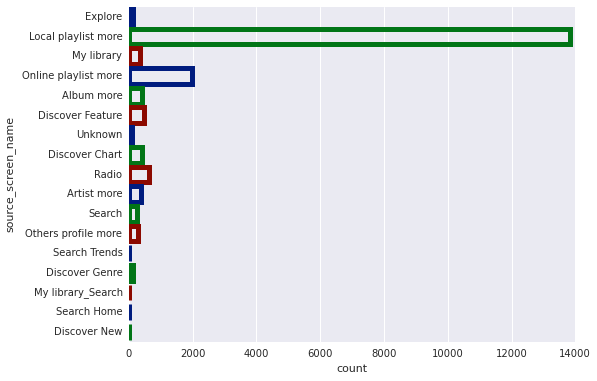

In [11]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(y=train['source_screen_name'], data=train, facecolor=(0, 0, 0, 0),
                    linewidth=5,
                    edgecolor=sns.color_palette("dark", 3))
plt.show()

In [ ]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(y = "source_system_tab", data = train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="left")
plt.tight_layout()
plt.show()

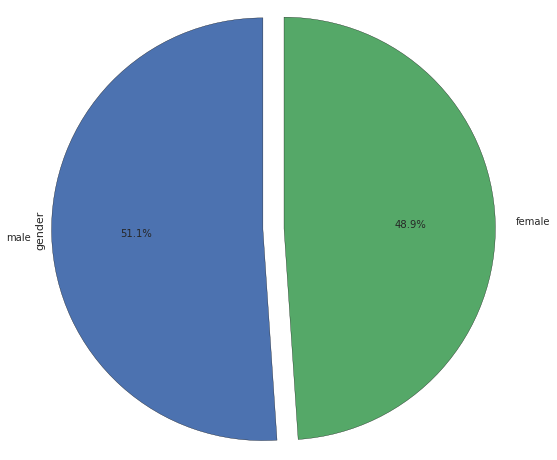

In [13]:

plt.figure(figsize = (8, 8))
pp = pd.value_counts(members.gender)
pp.plot.pie(startangle=90, autopct='%1.1f%%', shadow=False, explode=(0.05, 0.05))
plt.axis('equal')
plt.show()

In [14]:
train_members = pd.merge(train, members, on='msno', how='inner')
train_merged = pd.merge(train_members, songs, on='song_id', how='outer')
print(train_merged.head())
print(len(train_merged.columns))
print('\n')
#--- Performing the same for test set ---
test_members = pd.merge(test, members, on='msno', how='inner')
test_merged = pd.merge(test_members, songs, on='song_id', how='outer')
print(test_merged.head())
print(len(test_merged.columns))

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
2  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
3  hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   
2  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=           explore   
3  3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=          discover   
4  bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=           explore   

  source_screen_name      source_type  target  city  bd gender  \
0            Explore  online-playlist       1     1   0    NaN   
1            Explore  online-playlist       1     1   0    NaN   
2            Explore  online-playlist       1     1   0    NaN   
3     Discover

In [15]:
del train_members
del test_members

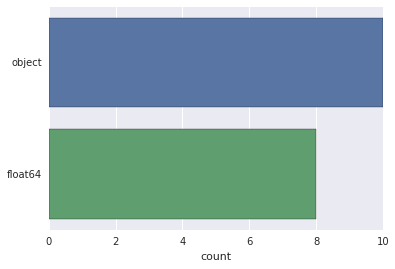

In [16]:
ax = sns.countplot(y=train_merged.dtypes, data=train_merged)

In [17]:
print(train_merged.columns.to_series().groupby(train_merged.dtypes).groups)

{dtype('O'): ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist'], dtype('float64'): ['target', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'language']}


In [18]:
print(test_merged.columns.to_series().groupby(test_merged.dtypes).groups)

{dtype('O'): ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist'], dtype('float64'): ['id', 'city', 'bd', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'language']}


In [19]:
#--- Function to check if missing values are present and if so print the columns having them ---
def check_missing_values(df):
    print (df.isnull().values.any())
    if (df.isnull().values.any() == True):
        columns_with_Nan = df.columns[df.isnull().any()].tolist()
    print(columns_with_Nan)
    for col in columns_with_Nan:
        print("%s : %d" % (col, df[col].isnull().sum()))
    
check_missing_values(train_merged)
check_missing_values(test_merged)

True
['msno', 'source_system_tab', 'source_screen_name', 'source_type', 'target', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
msno : 38665
source_system_tab : 38715
source_screen_name : 39241
source_type : 38715
target : 38665
city : 38665
bd : 38665
gender : 46377
registered_via : 38665
registration_init_time : 38665
expiration_date : 38665
song_length : 17154
genre_ids : 17895
artist_name : 17154
composer : 34148
lyricist : 46653
language : 17154
True
['id', 'msno', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time', 'expiration_date', 'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist', 'language']
id : 39524
msno : 39524
source_system_tab : 39526
source_screen_name : 39742
source_type : 39526
city : 39524
bd : 39524
gender : 41665
registered_via : 39524
registration_init_time

In [20]:
#--- Function to replace Nan values in columns of type float with -5 ---
def replace_Nan_non_object(df):
    object_cols = list(df.select_dtypes(include=['float']).columns)
    for col in object_cols:
        df[col]=df[col].fillna(np.int(-5))
       
replace_Nan_non_object(train_merged) 
replace_Nan_non_object(test_merged)  

In [21]:
#--- Function to replace Nan values in columns of type object with 'Others' ---
def replace_Nan_object(df):
    object_cols = list(df.select_dtypes(include=['object']).columns)
    for col in object_cols:
        df[col]=df[col].fillna(' ')
    print (object_cols)

replace_Nan_object(train_merged)  
replace_Nan_object(test_merged)  
#check_missing_values(cop)
#print(object_cols)

['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']
['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'gender', 'genre_ids', 'artist_name', 'composer', 'lyricist']


In [22]:
#--- memory consumed by train dataframe ---
mem = train_merged.memory_usage(index=True).sum()
print("Memory consumed by training set  :   {} MB" .format(mem/ 1024**2))
 
#--- memory consumed by test dataframe ---
mem = test_merged.memory_usage(index=True).sum()
print("Memory consumed by test set      :   {} MB" .format(mem/ 1024**2))

Memory consumed by training set  :   8 MB
Memory consumed by test set      :   6 MB


In [23]:
def change_datatype(df):
    float_cols = list(df.select_dtypes(include=['float']).columns)
    for col in float_cols:
        if ((np.max(df[col]) <= 127) and(np.min(df[col] >= -128))):
            df[col] = df[col].astype(np.int8)
        elif ((np.max(df[col]) <= 32767) and(np.min(df[col] >= -32768))):
            df[col] = df[col].astype(np.int16)
        elif ((np.max(df[col]) <= 2147483647) and(np.min(df[col] >= -2147483648))):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)

change_datatype(train_merged)
change_datatype(test_merged)           

In [24]:
train_merged = train_merged[train_merged.target != -5]
len(train_merged.index)

19999

In [ ]:
data = train_merged.groupby('target').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='target', y='msno', data=data)

In [ ]:
data = train_merged.groupby('source_system_tab').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_system_tab', y='msno', data=data)

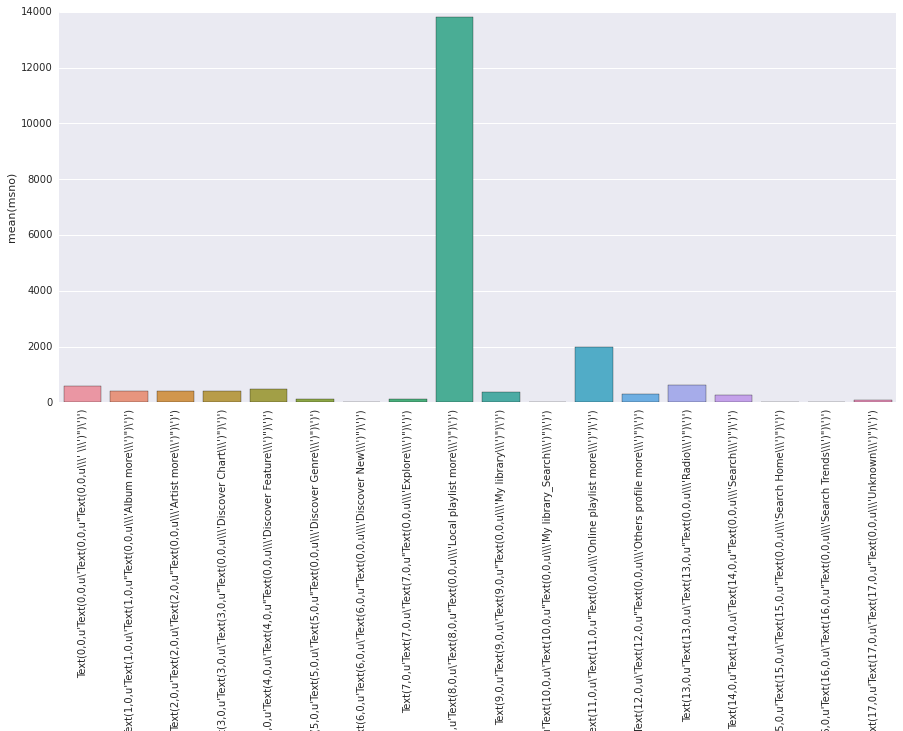

In [27]:
data = train_merged.groupby('source_screen_name').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_screen_name', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

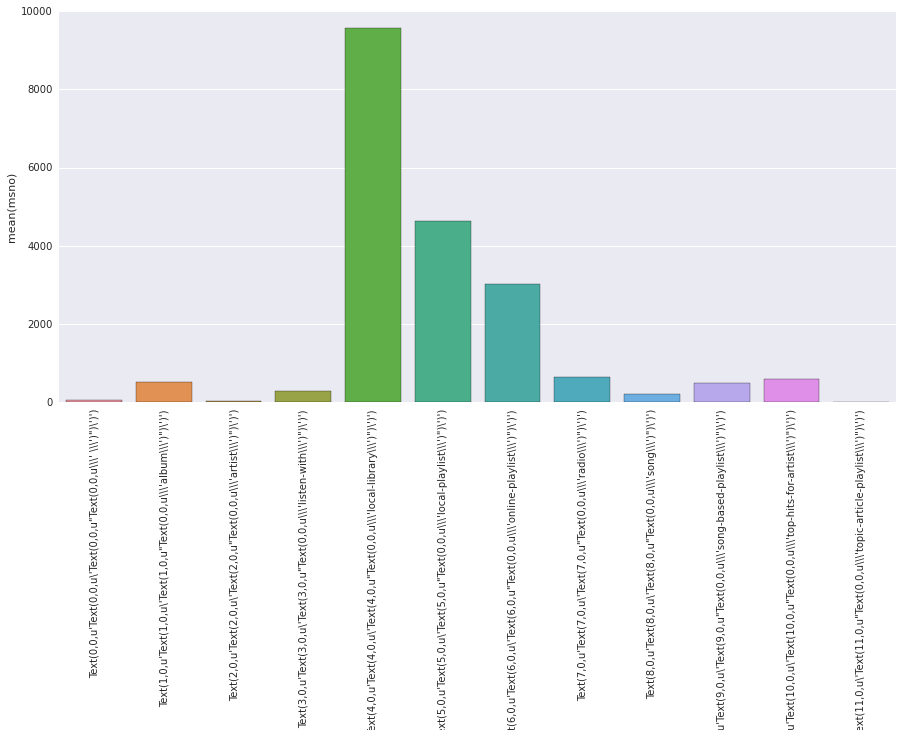

In [28]:
data = train_merged.groupby('source_type').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='source_type', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

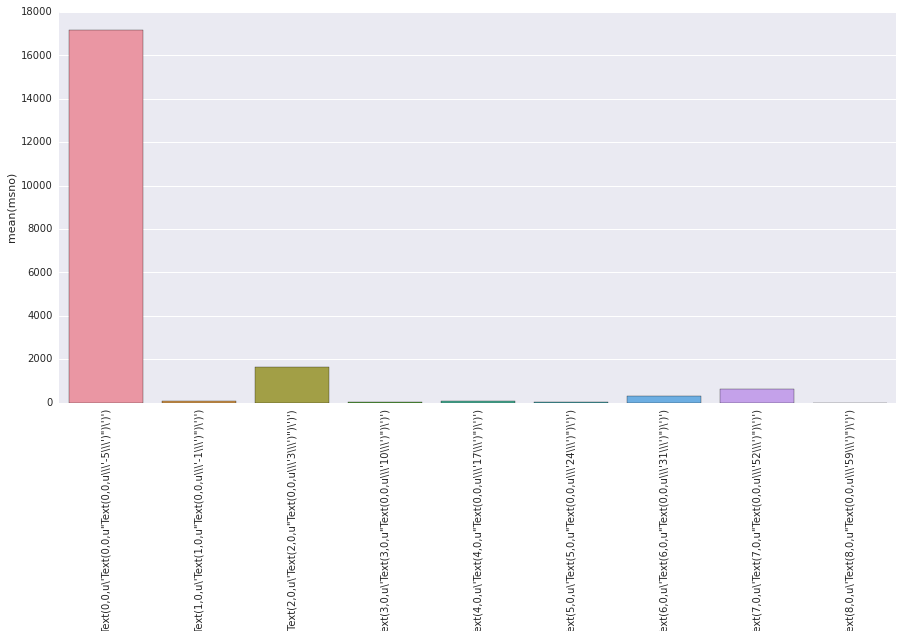

In [29]:
data = train_merged.groupby('language').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='language', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

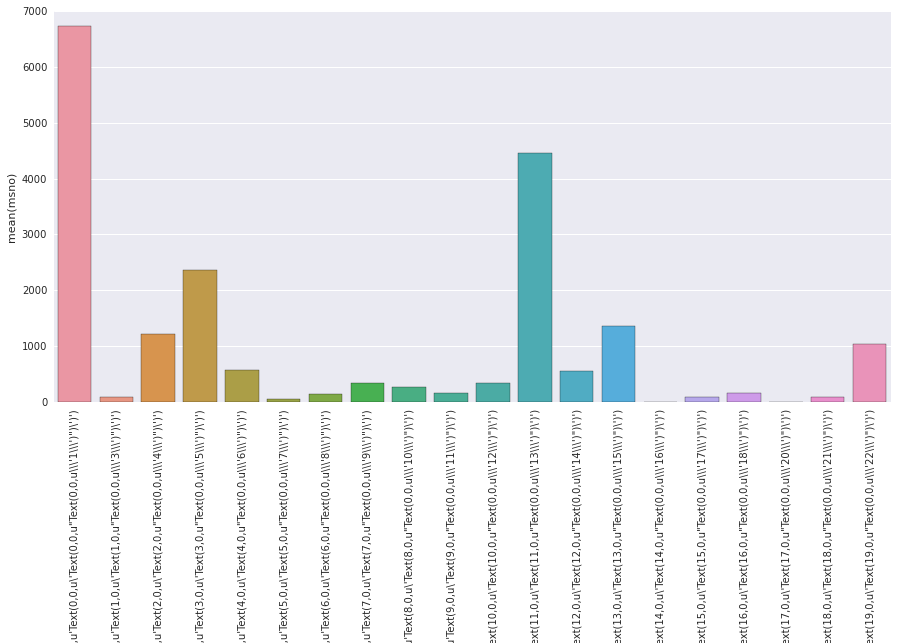

In [31]:
data = train_merged.groupby('city').aggregate({'msno':'count'}).reset_index()
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='city', y='msno', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)